# Assignment 14 - Decision Tree (Company Data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.shape

(400, 11)

In [4]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [8]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### Encoding

In [9]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])

In [11]:
company1 = encoder.fit_transform(company)

In [12]:
company_val = []
for value in company["Sales"]:
    if value <= 7.49:
        company_val.append('low')
    else:
        company_val.append('high')
        
company1['company_val'] = company_val

In [13]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,3,55,11,2,1,low
397,7.41,162,26,12,368,159,3,40,18,1,1,low
398,5.94,100,79,7,284,95,1,50,12,1,1,low


In [14]:
features = company1.drop(['company_val','Sales'], axis =1)
features

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [15]:
target = company1['company_val']
target

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: company_val, Length: 400, dtype: object

### Model Building using Entropy & Performing Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features,target,train_size=0.75,random_state=40)

In [18]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

In [19]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

##### Prediction on Training Data

In [20]:
pred_train1 = model1.predict(x_train)

In [21]:
accuracy_score(pred_train1,y_train)

0.7766666666666666

In [22]:
print(classification_report(pred_train1,y_train))

              precision    recall  f1-score   support

        high       0.90      0.73      0.81       193
         low       0.64      0.86      0.73       107

    accuracy                           0.78       300
   macro avg       0.77      0.80      0.77       300
weighted avg       0.81      0.78      0.78       300



##### Prediction on Test Data

In [23]:
pred_test1 = model1.predict(x_test)

In [24]:
accuracy_score(pred_test1,y_test)

0.65

In [25]:
print(classification_report(pred_test1,y_test))

              precision    recall  f1-score   support

        high       0.86      0.56      0.68        66
         low       0.49      0.82      0.62        34

    accuracy                           0.65       100
   macro avg       0.68      0.69      0.65       100
weighted avg       0.73      0.65      0.66       100



##### Visualising the Decision Tree using Entropy (Model 1)

Text(0.5, 1.0, 'Decision Tree using Entropy (Model 1)')

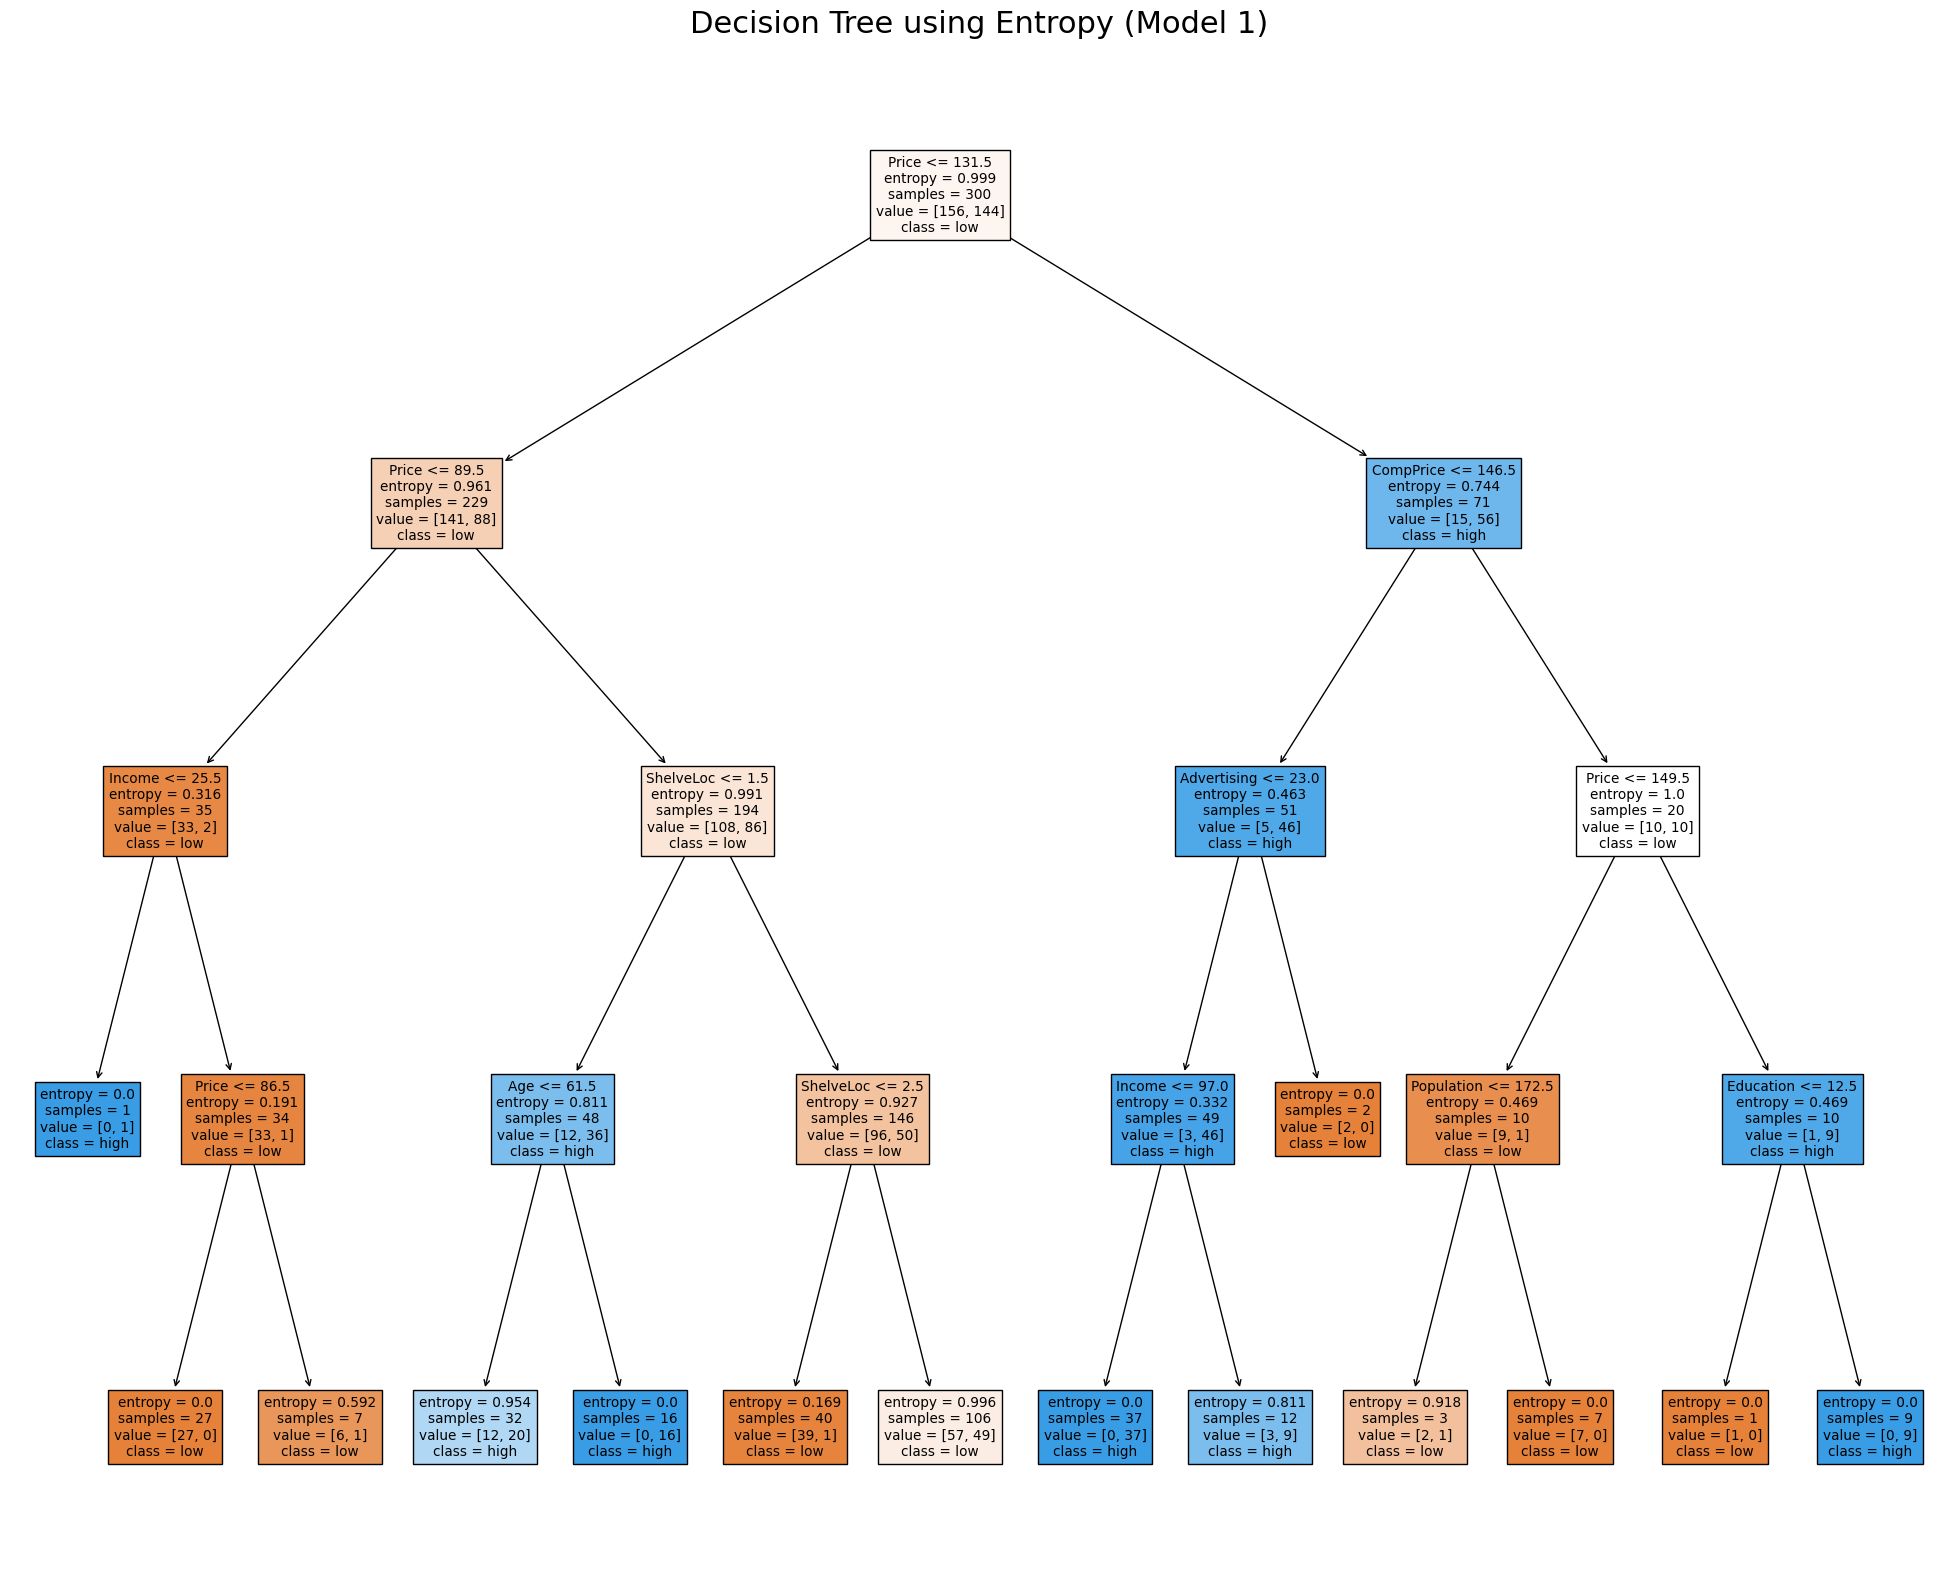

In [26]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1, feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], class_names=['low','high'], filled=True)
plt.title('Decision Tree using Entropy (Model 1)',fontsize=22)

### Model Building with (max_depth=6)

In [27]:
model2 = DecisionTreeClassifier(criterion ='entropy', max_depth=6)

In [28]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

##### Prediction on Training Data

In [29]:
pred_train2 = model2.predict(x_train)

In [30]:
accuracy_score(pred_train2,y_train)

0.91

In [31]:
print(classification_report(pred_train2,y_train))

              precision    recall  f1-score   support

        high       0.87      0.96      0.91       141
         low       0.96      0.87      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



##### Prediction on Test Data

In [32]:
pred_test2 = model2.predict(x_test)

In [33]:
accuracy_score(pred_test2,y_test)

0.69

In [34]:
print(classification_report(pred_test2,y_test))

              precision    recall  f1-score   support

        high       0.51      0.69      0.59        32
         low       0.82      0.69      0.75        68

    accuracy                           0.69       100
   macro avg       0.67      0.69      0.67       100
weighted avg       0.72      0.69      0.70       100



##### Visualising the Decision Tree using Entropy (Model 2)

Text(0.5, 1.0, 'Decision Tree using Entropy (Model 2)')

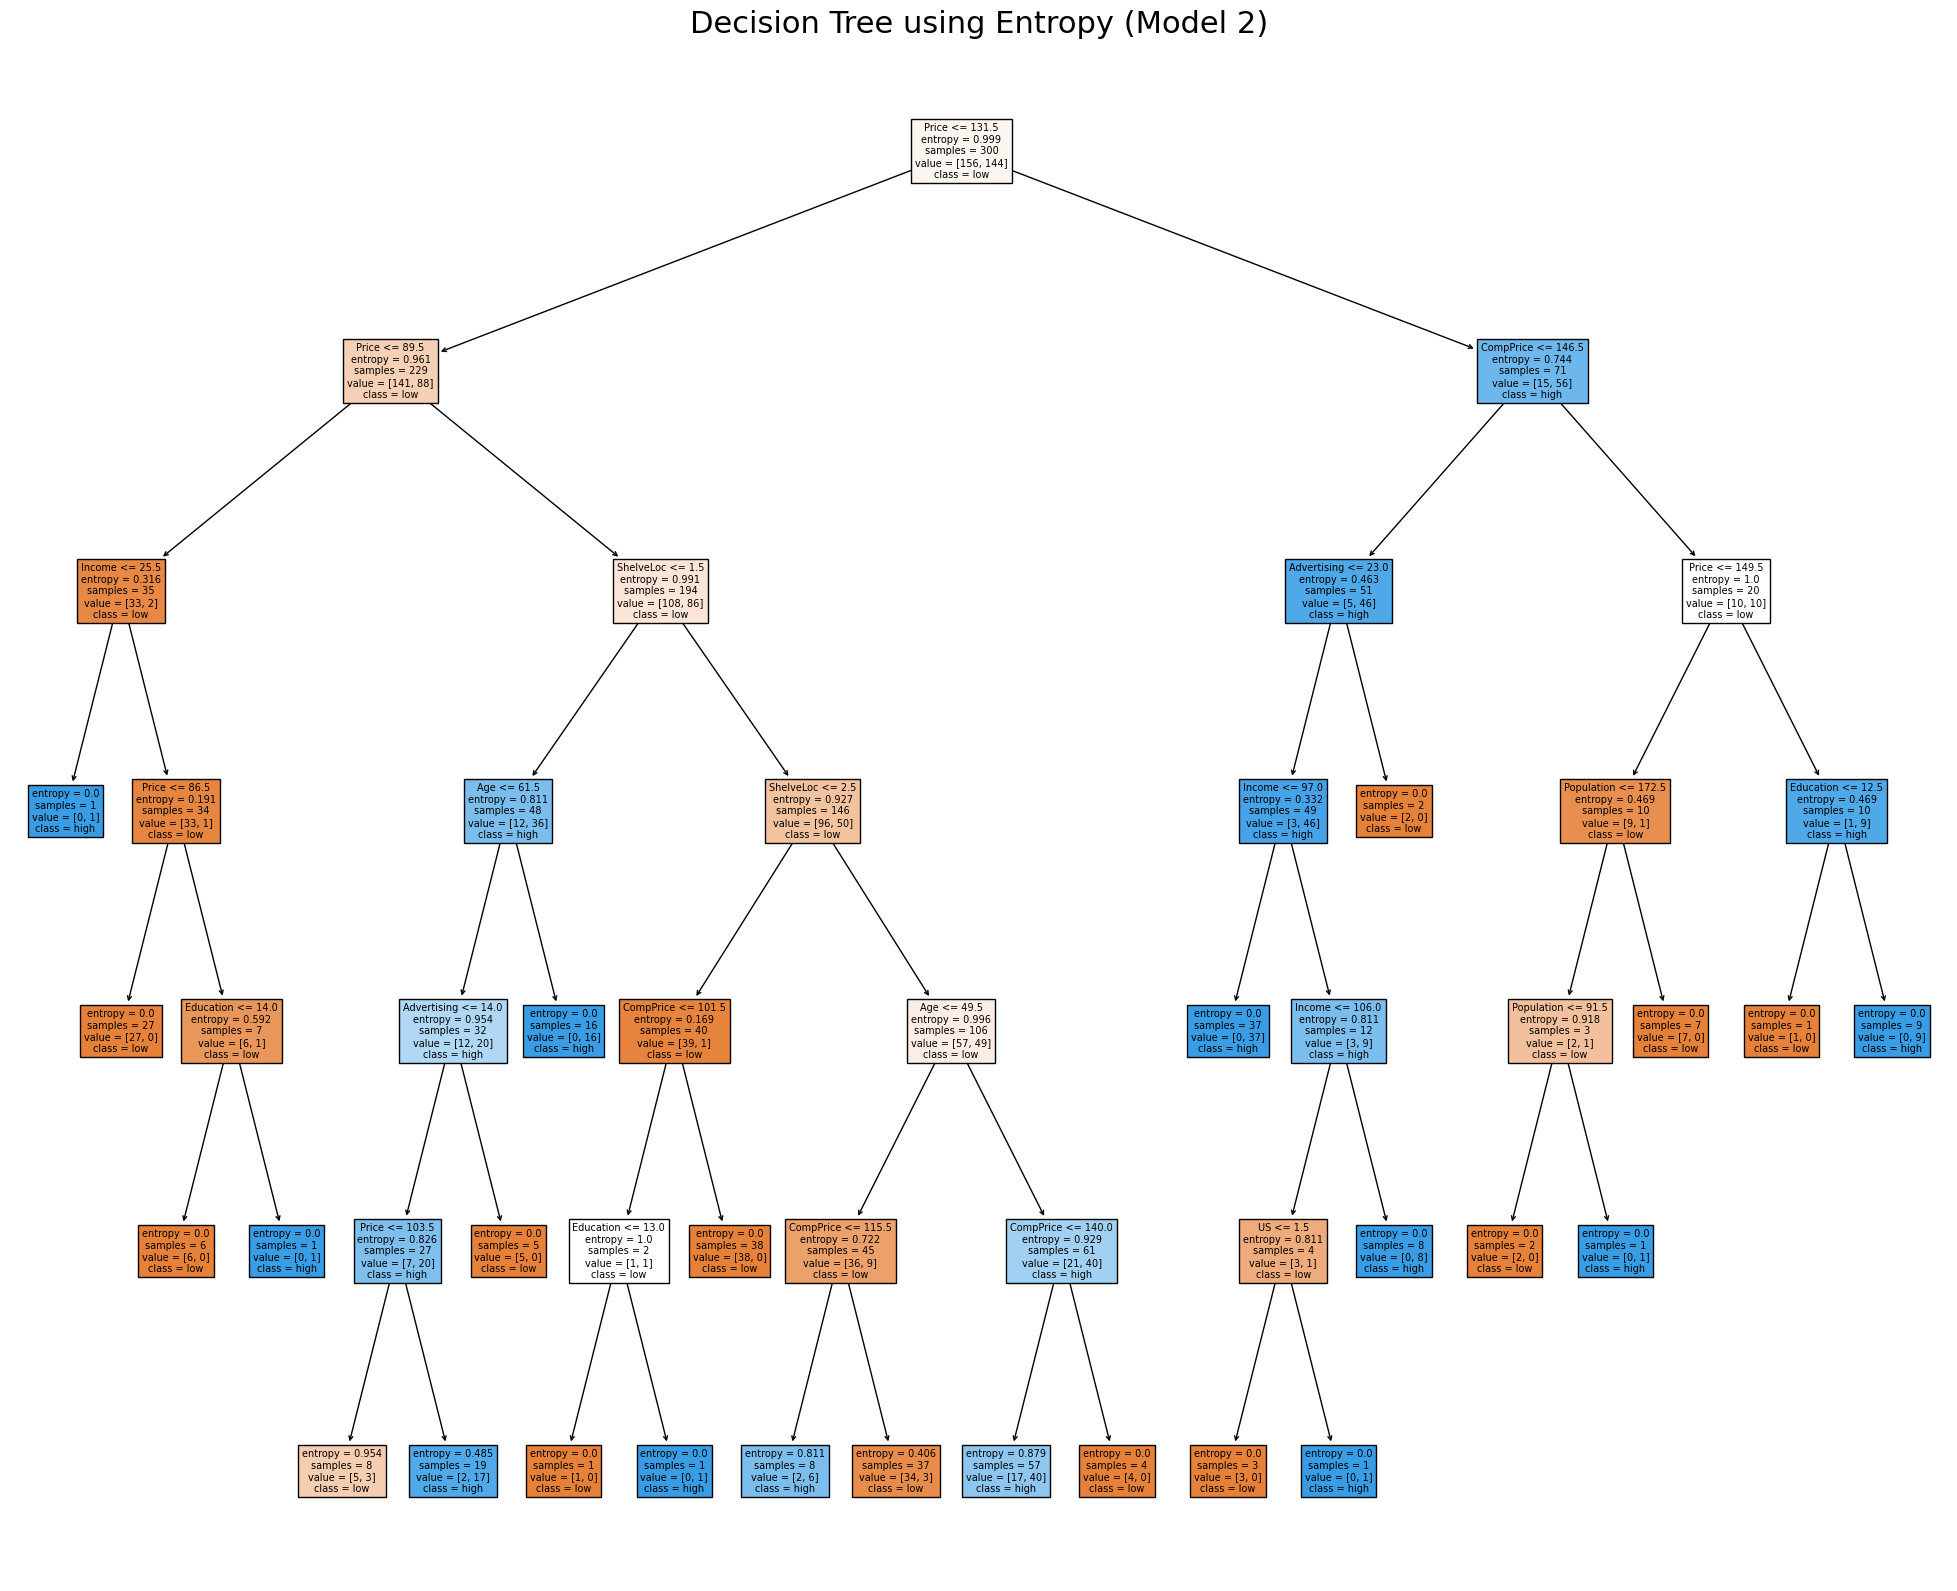

In [35]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2, feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], class_names=['low','high'], filled=True)
plt.title('Decision Tree using Entropy (Model 2)',fontsize=22)

### Model Building with (max_depth=7)

In [36]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [37]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

##### Prediction on Training Data

In [38]:
pred_train3 = model3.predict(x_train)

In [39]:
accuracy_score(pred_train3,y_train)

0.93

In [40]:
print(classification_report(pred_train3,y_train))

              precision    recall  f1-score   support

        high       0.96      0.91      0.93       165
         low       0.90      0.96      0.92       135

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



##### Prediction on Test Data

In [41]:
pred_test3 = model3.predict(x_test)

In [42]:
accuracy_score(pred_test3,y_test)

0.7

In [43]:
print(classification_report(pred_test3,y_test))

              precision    recall  f1-score   support

        high       0.67      0.64      0.66        45
         low       0.72      0.75      0.73        55

    accuracy                           0.70       100
   macro avg       0.70      0.69      0.70       100
weighted avg       0.70      0.70      0.70       100



##### Visualising the Decision Tree using Entropy (Model 3)

Text(0.5, 1.0, 'Decision Tree using Entropy (Model 3)')

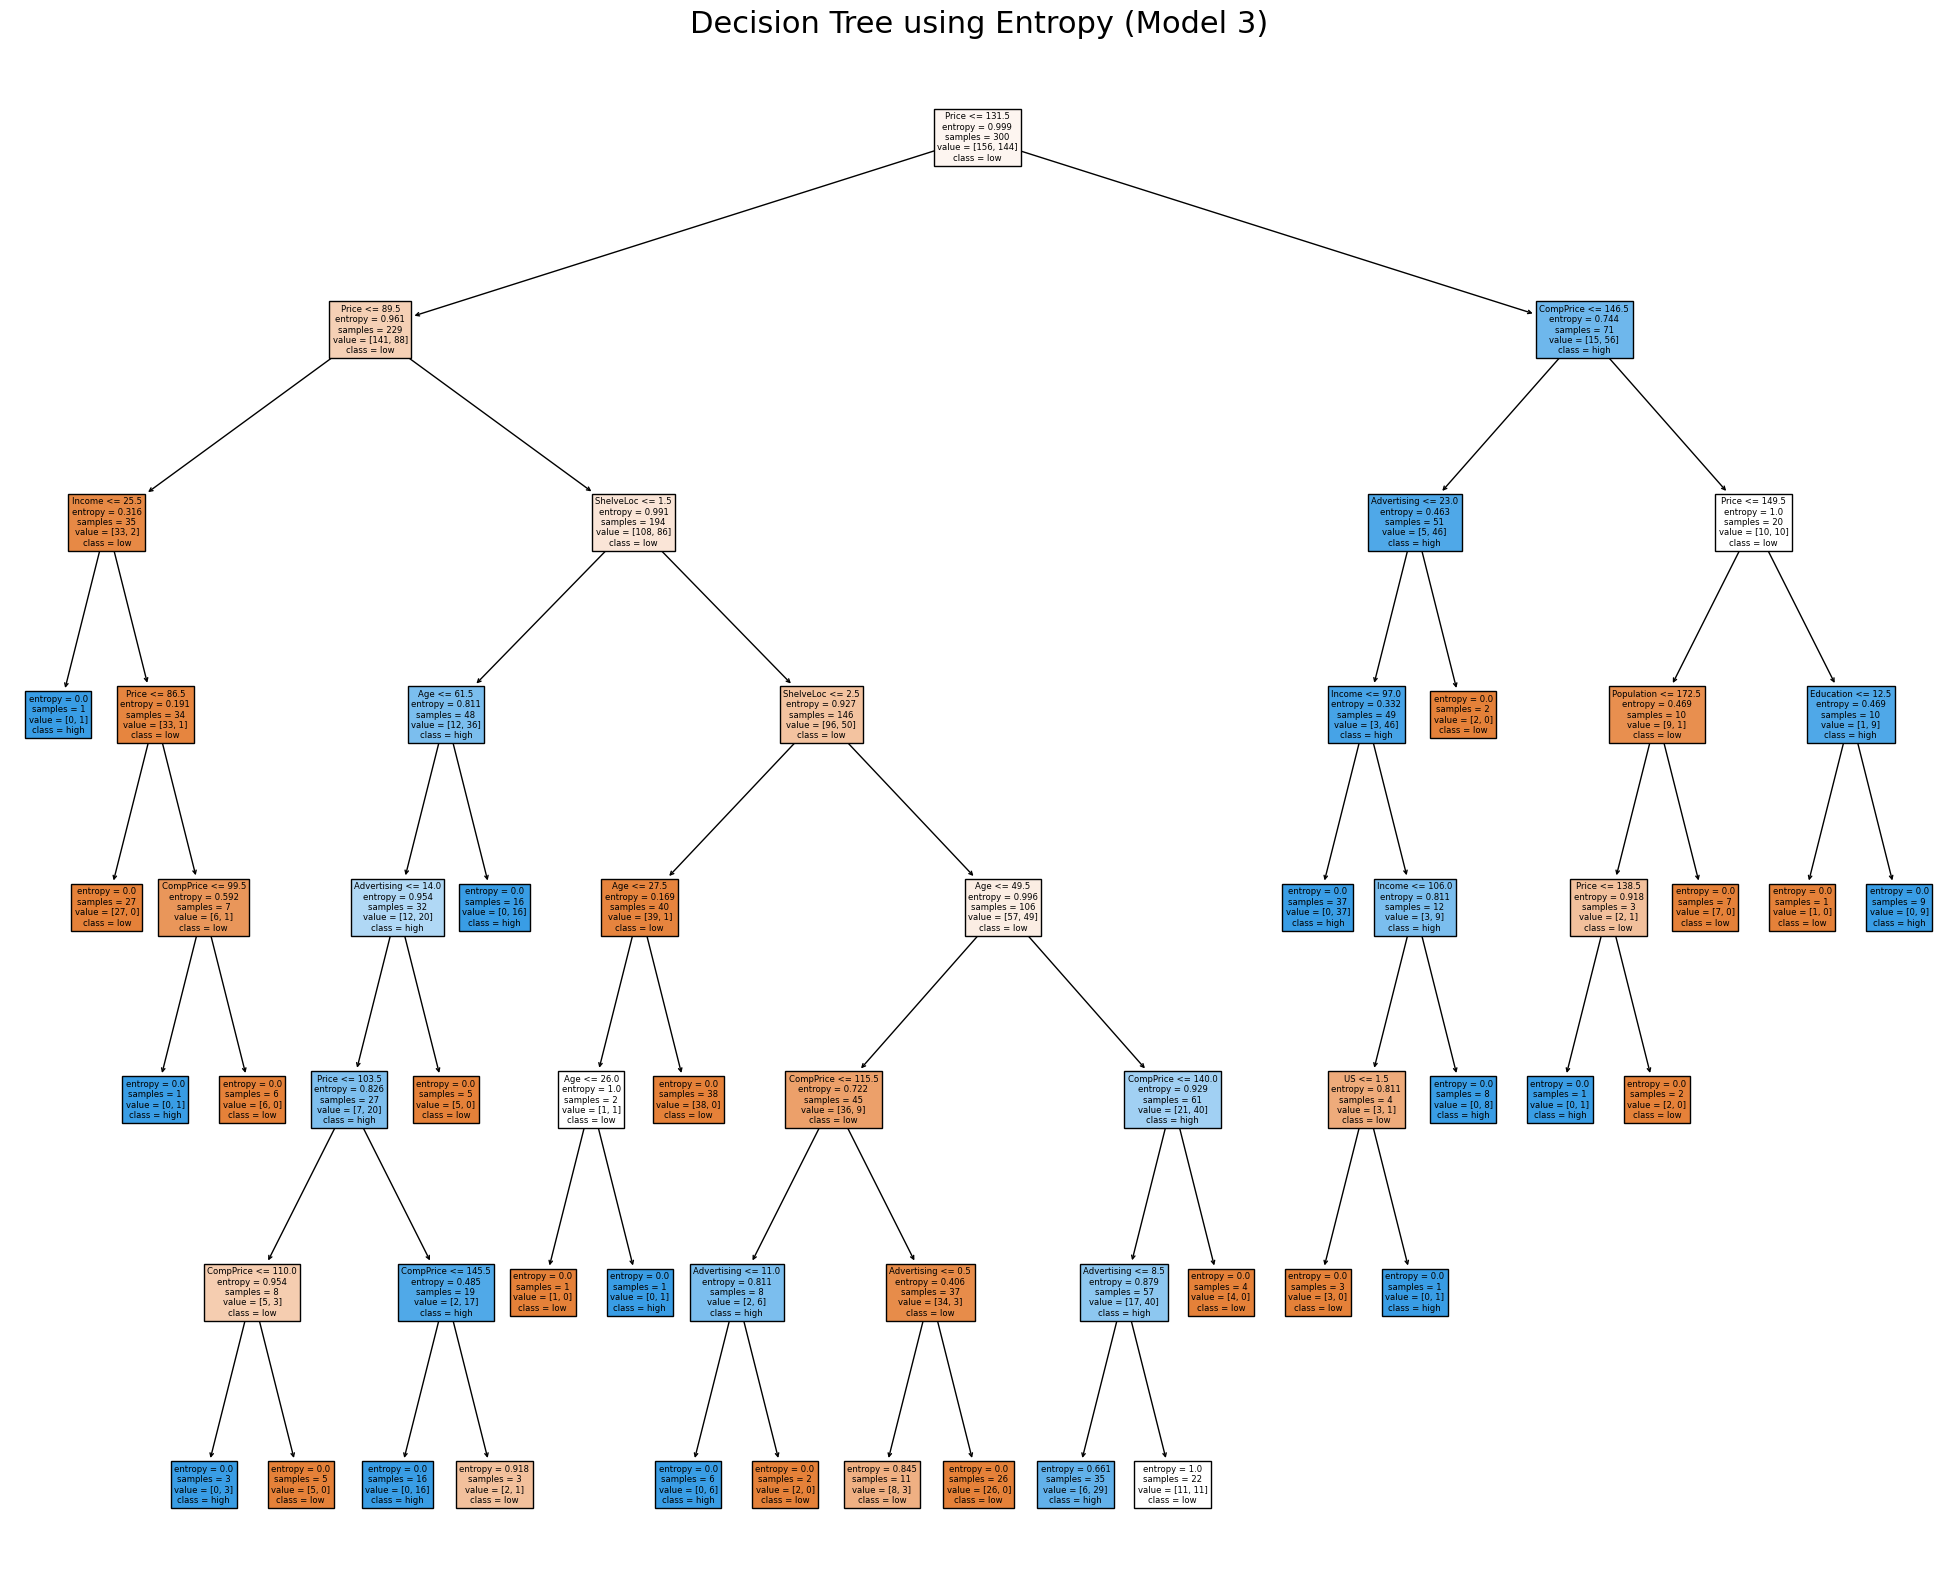

In [44]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model3, feature_names=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision Tree using Entropy (Model 3)',fontsize=22)

### Model Building using Gini

In [45]:
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [46]:
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

##### Prediction on Training Data

In [47]:
pred_train_g1 = model_gini1.predict(x_train)

In [48]:
accuracy_score(pred_train_g1,y_train)

0.8966666666666666

In [49]:
print(classification_report(pred_train_g1,y_train))

              precision    recall  f1-score   support

        high       0.88      0.92      0.90       149
         low       0.92      0.87      0.89       151

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



##### Prediction on Test Data

In [50]:
pred_test_g1 = model_gini1.predict(x_test)

In [51]:
accuracy_score(pred_test_g1,y_test)

0.76

In [52]:
print(classification_report(pred_test_g1,y_test))

              precision    recall  f1-score   support

        high       0.79      0.69      0.74        49
         low       0.74      0.82      0.78        51

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



##### Visualising the Decision Tree using Gini (Model 1)

Text(0.5, 1.0, 'Decision Tree using Gini (Model 1)')

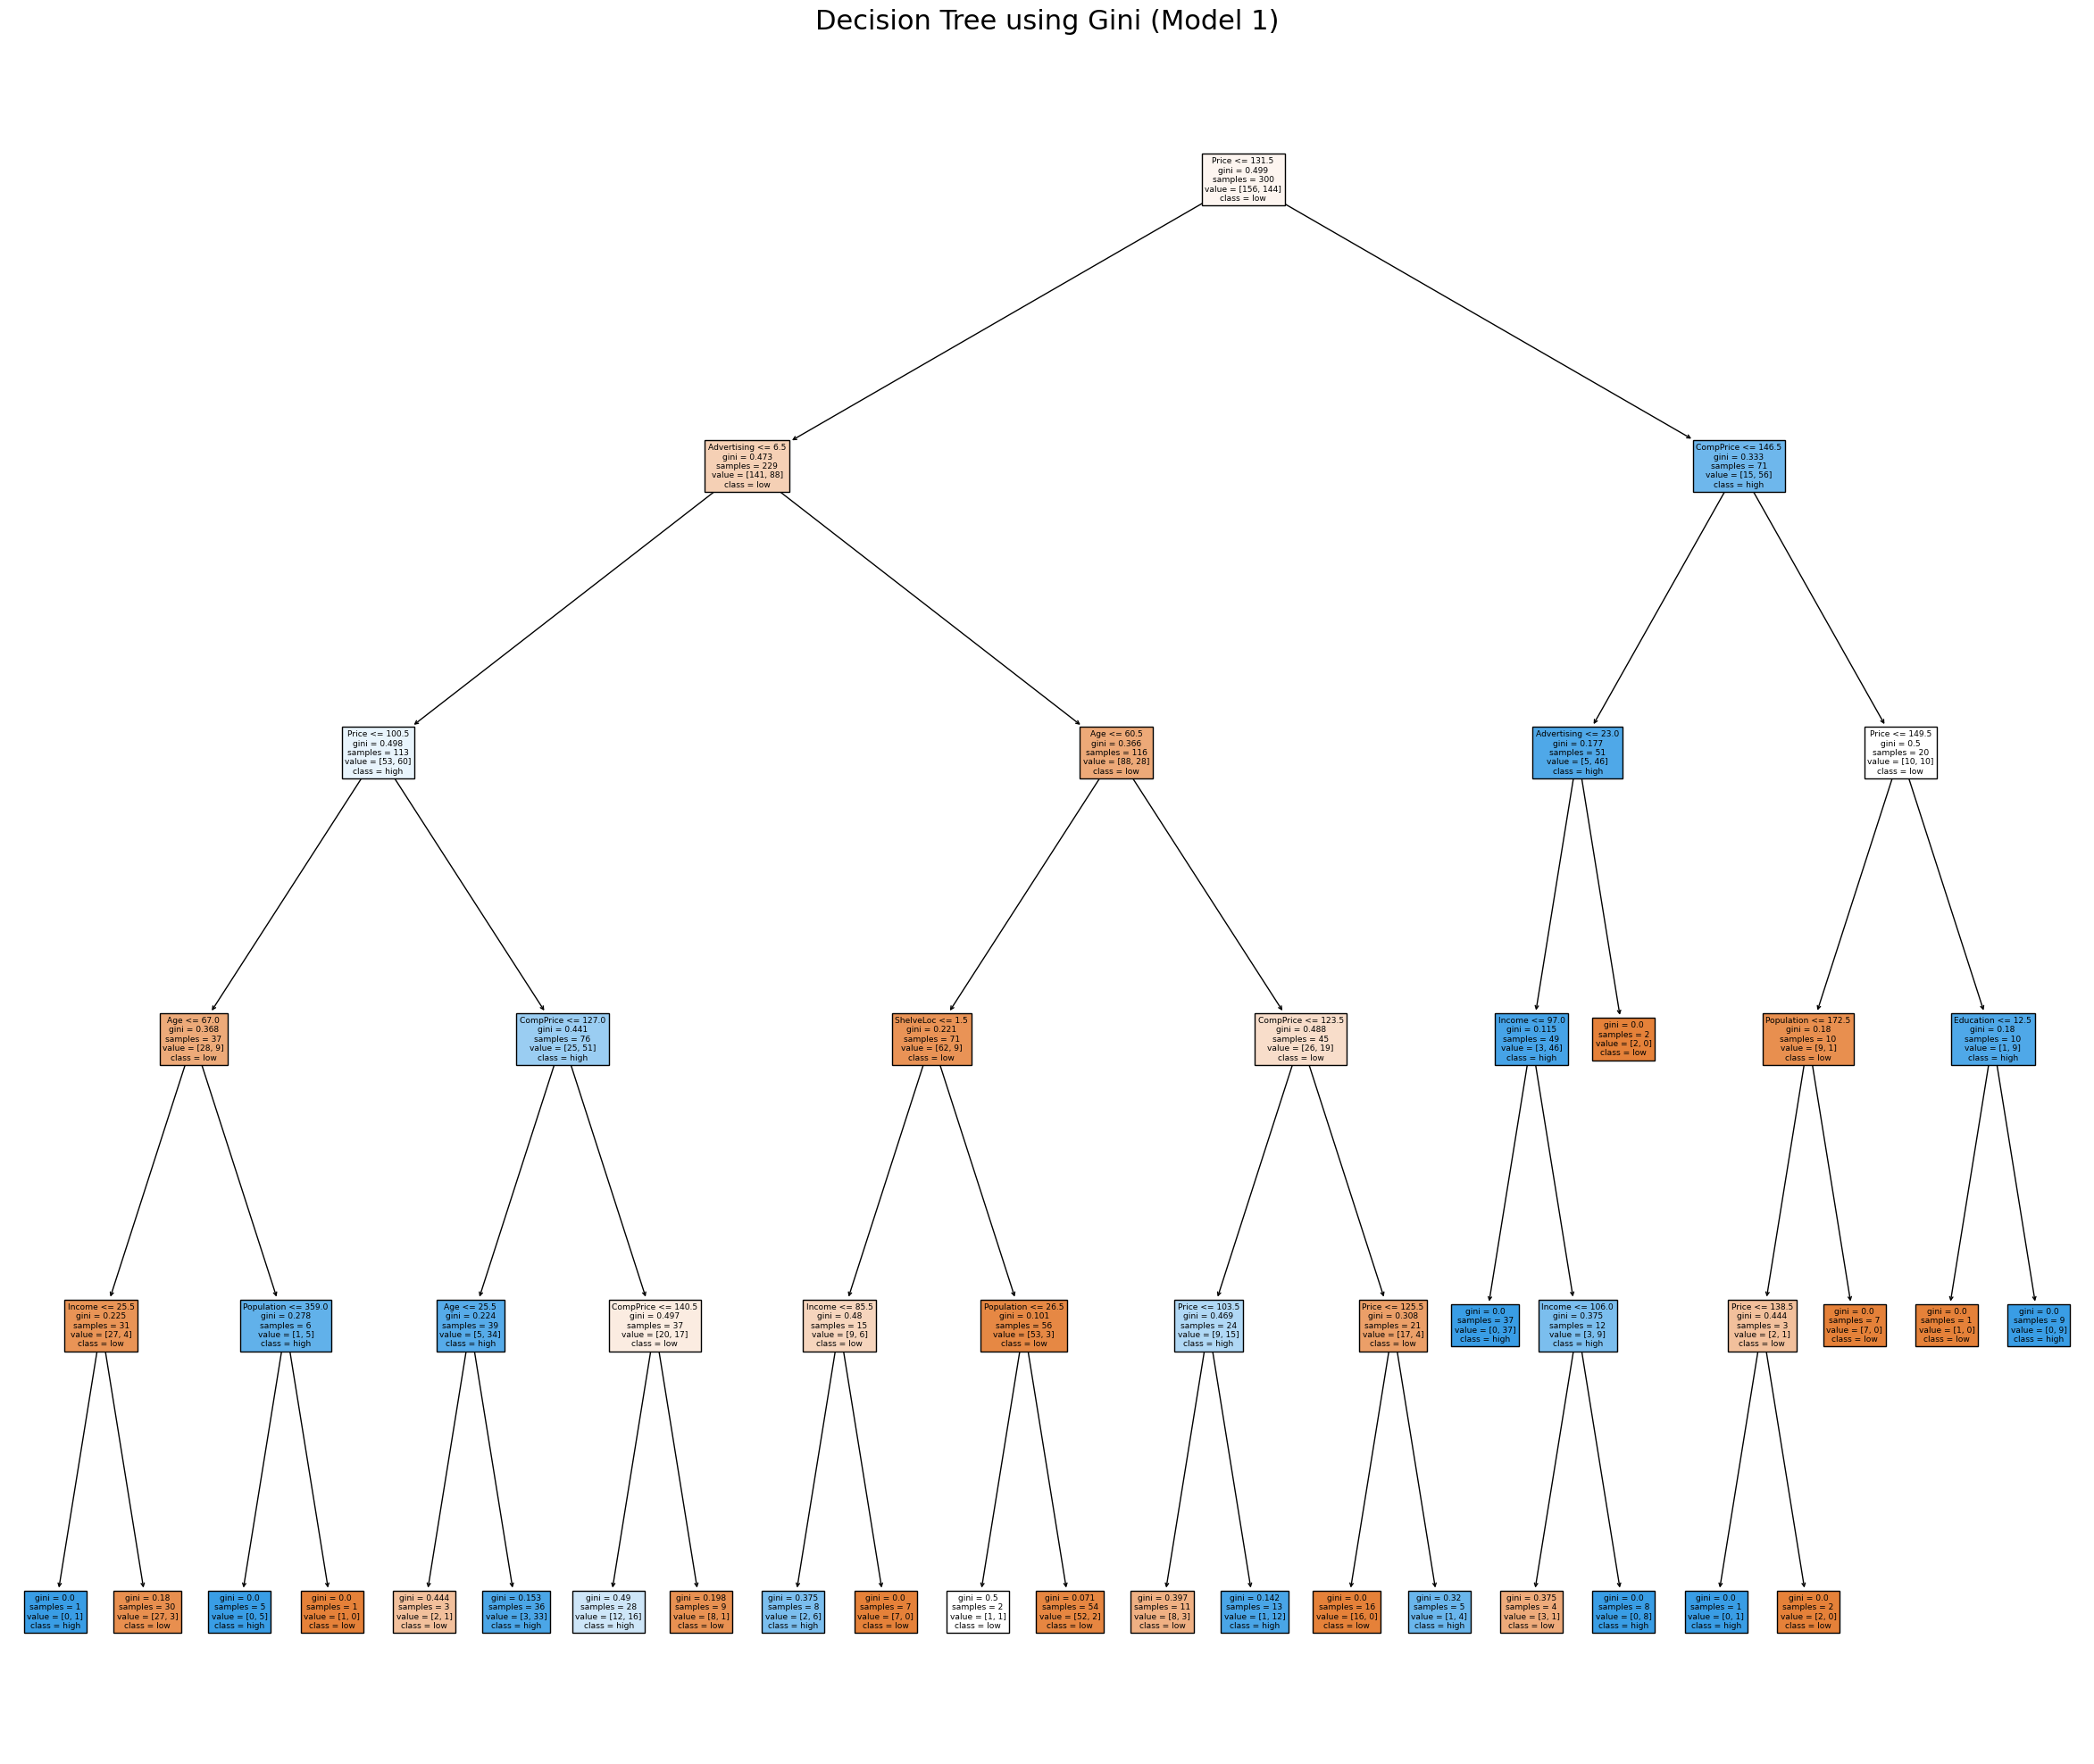

In [53]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1, feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], class_names= ['low','high'], filled=True)
plt.title('Decision Tree using Gini (Model 1)',fontsize=22)

### Model Building with Gini (max_depth=6)

In [54]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [55]:
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

##### Prediction on Training Data

In [56]:
pred_train_g2 = model_gini2.predict(x_train)

In [57]:
accuracy_score(pred_train_g2,y_train)

0.9333333333333333

In [58]:
print(classification_report(pred_train_g2,y_train))

              precision    recall  f1-score   support

        high       0.97      0.90      0.94       168
         low       0.89      0.97      0.93       132

    accuracy                           0.93       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



##### Prediciton on Test Data

In [59]:
pred_test_g2 = model_gini2.predict(x_test)

In [60]:
accuracy_score(pred_test_g2,y_test)

0.72

In [61]:
print(classification_report(pred_test_g2,y_test))

              precision    recall  f1-score   support

        high       0.79      0.64      0.71        53
         low       0.67      0.81      0.73        47

    accuracy                           0.72       100
   macro avg       0.73      0.73      0.72       100
weighted avg       0.73      0.72      0.72       100



##### Visualising the Decision Tree using Gini (Model 2)

Text(0.5, 1.0, 'Decision Tree using Gini (Model 2)')

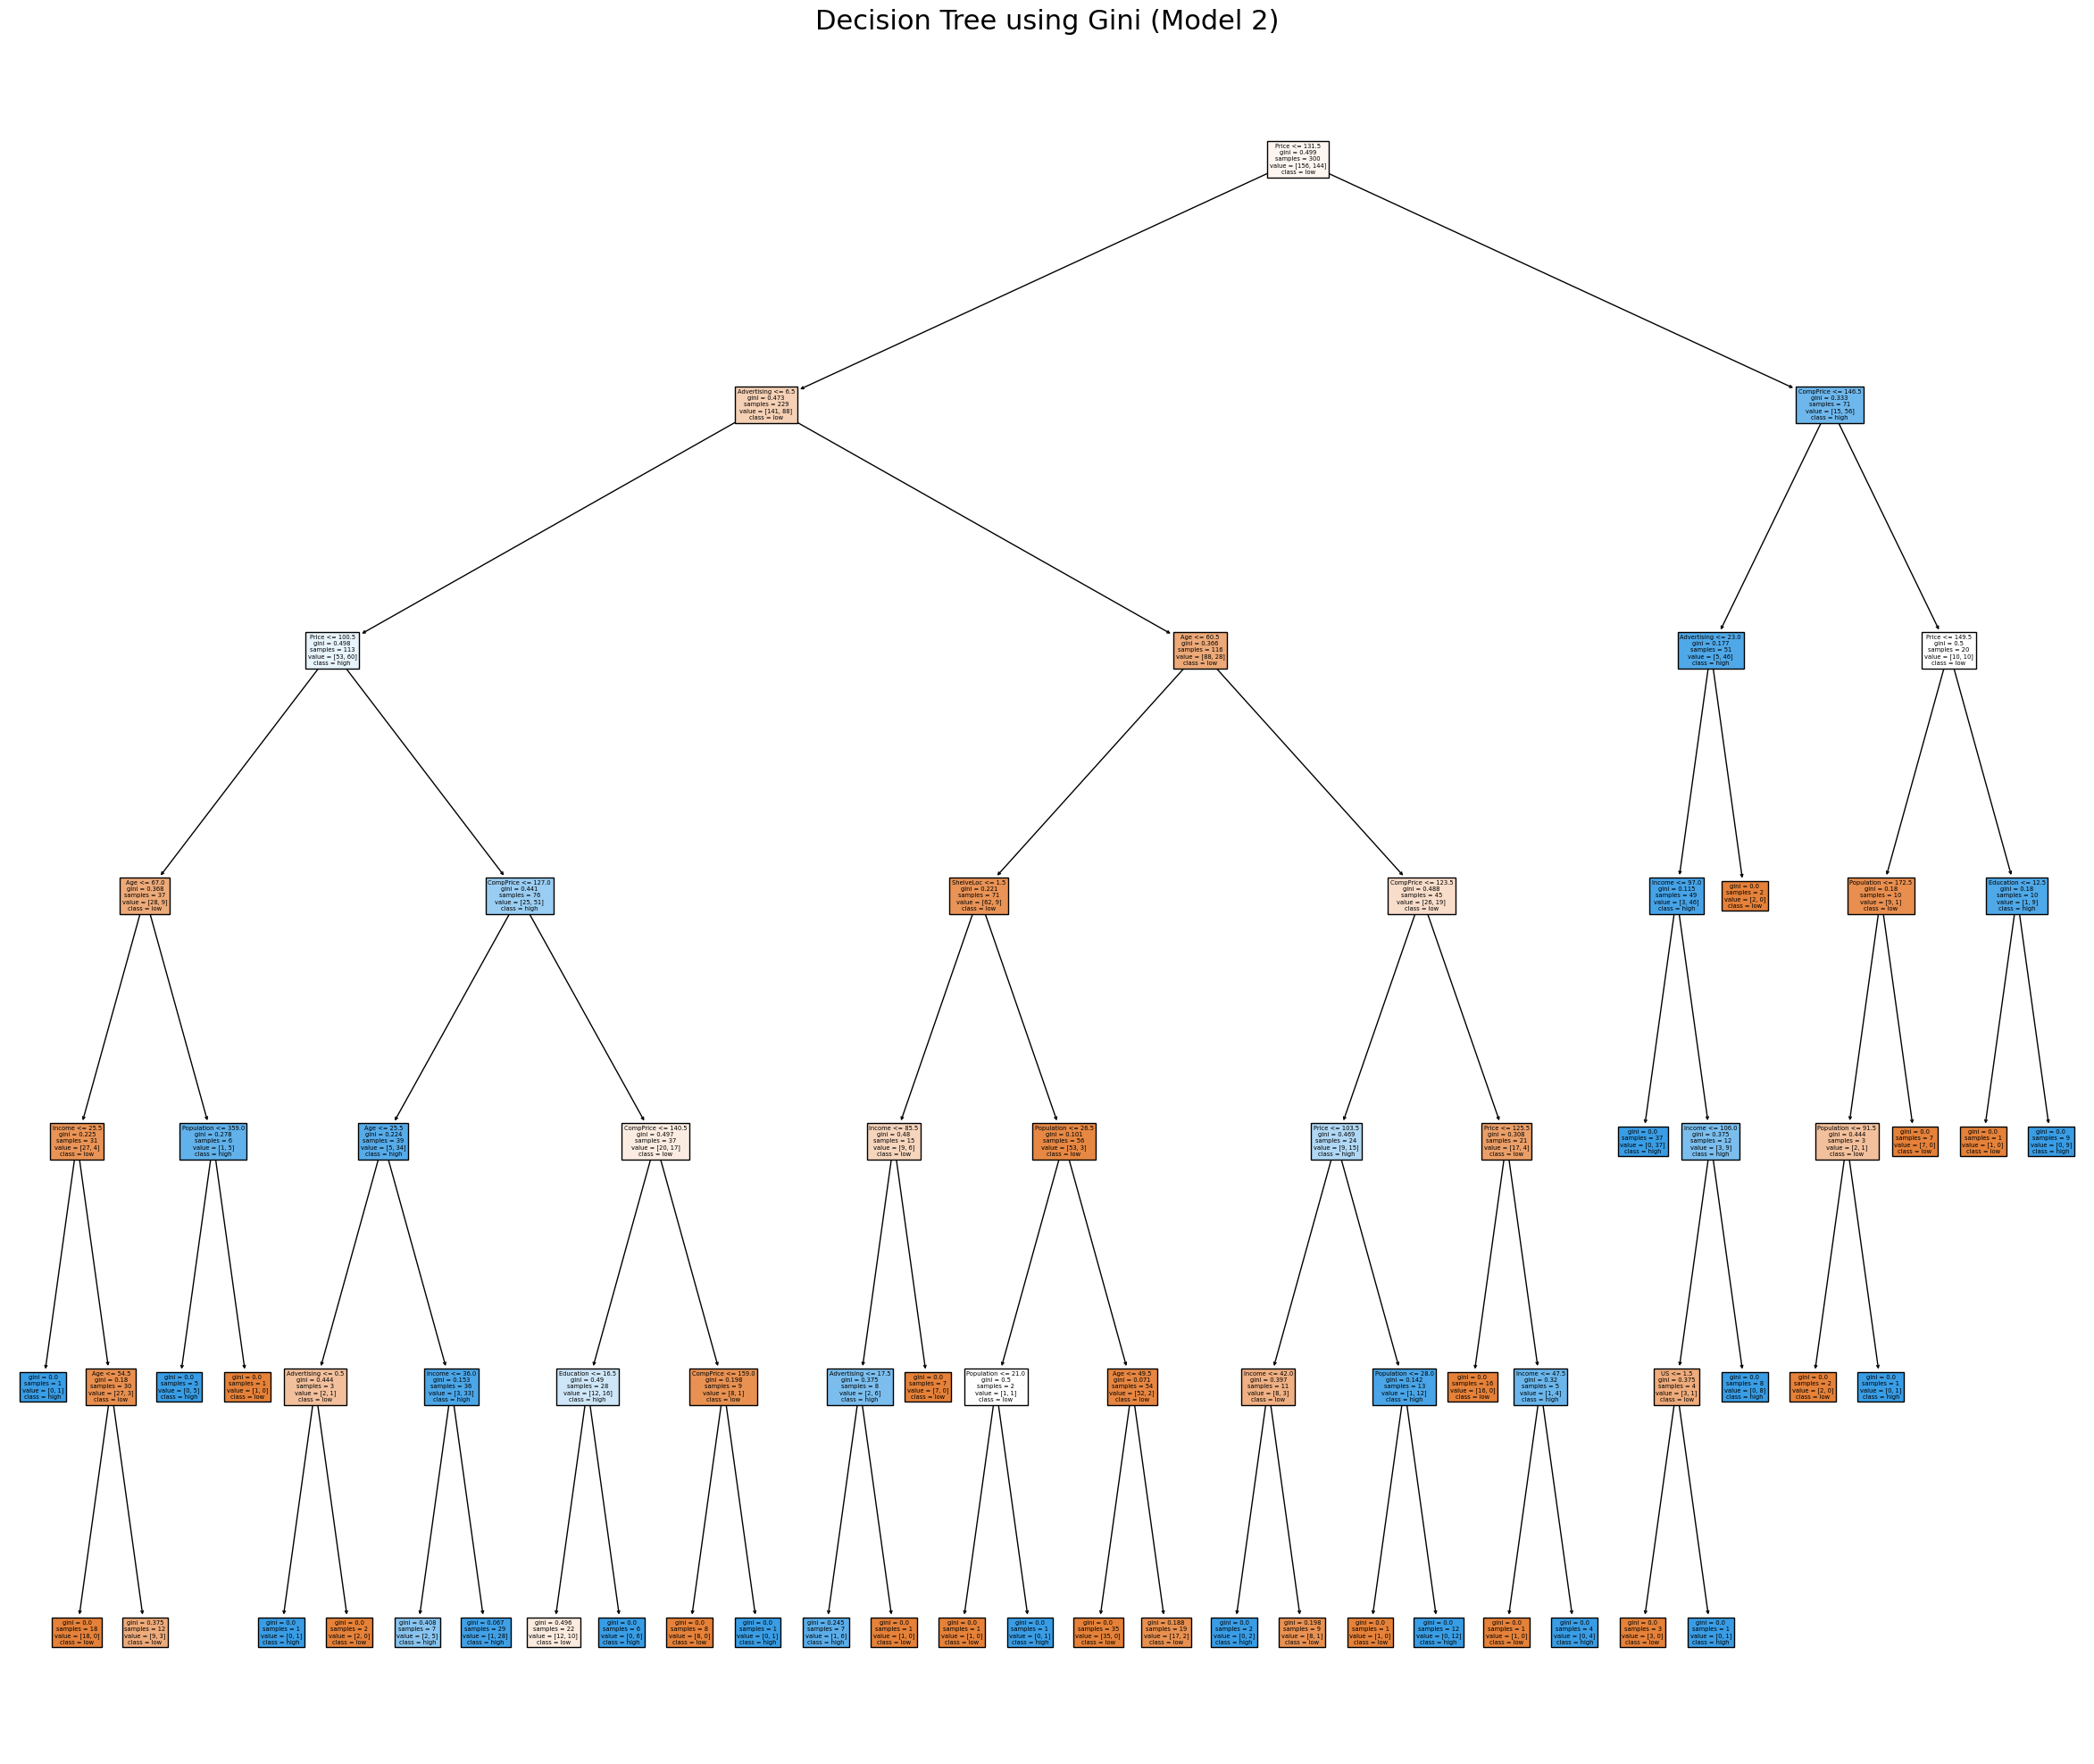

In [62]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini2, feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], class_names= ['low','high'], filled=True)
plt.title('Decision Tree using Gini (Model 2)', fontsize=22)

### Model Building with Gini (max_depth=7)

In [63]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [64]:
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

##### Prediction on Training Data

In [65]:
pred_train_g3 = model_gini3.predict(x_train)

In [66]:
accuracy_score(pred_train_g3,y_train)

0.96

In [67]:
print(classification_report(pred_train_g3,y_train))

              precision    recall  f1-score   support

        high       0.97      0.96      0.96       158
         low       0.95      0.96      0.96       142

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



##### Prediction on Test Data

In [68]:
pred_test_g3 = model_gini3.predict(x_test)

In [69]:
accuracy_score(pred_test_g3,y_test)

0.67

In [70]:
print(classification_report(pred_test_g3,y_test))

              precision    recall  f1-score   support

        high       0.70      0.60      0.65        50
         low       0.65      0.74      0.69        50

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



##### Visualising the Decision Tree using Gini (Model 3)

Text(0.5, 1.0, 'Decision Tree using Gini (Model 3)')

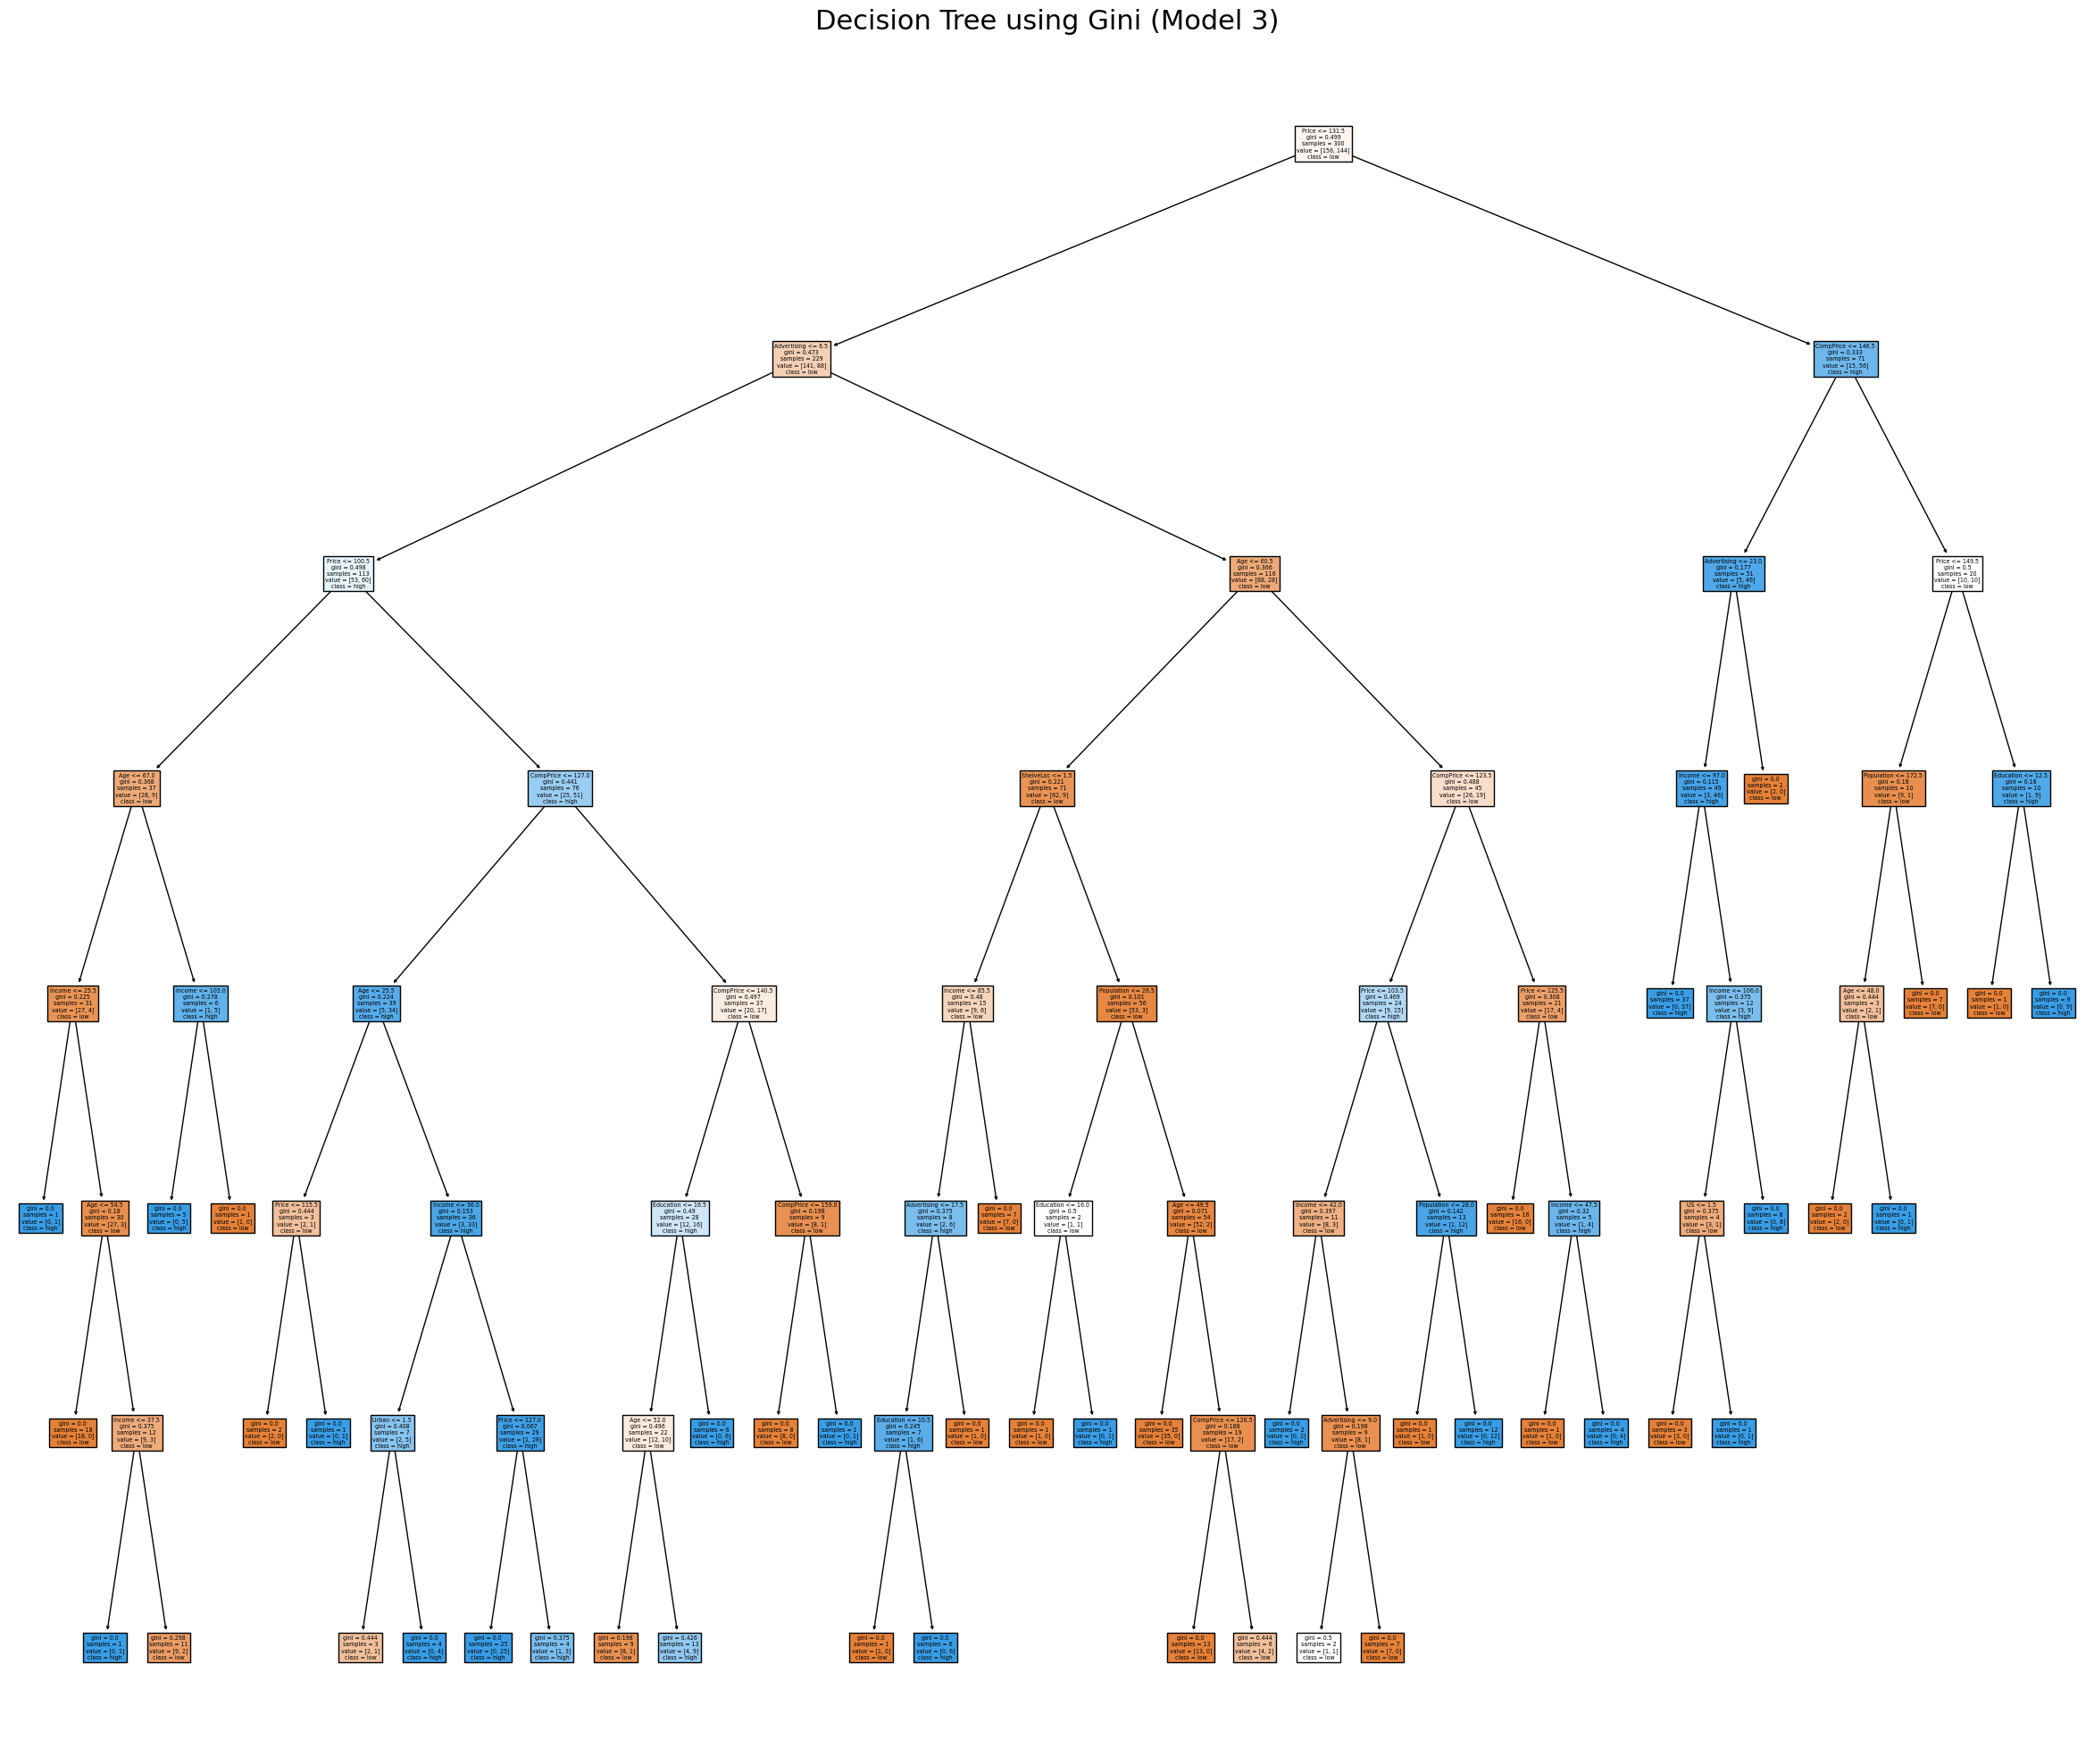

In [71]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini3, feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], class_names= ['low','high'], filled=True)
plt.title('Decision Tree using Gini (Model 3)', fontsize=22)